In [1]:
#importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the dataset

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df_train.shape

(8523, 12)

In [7]:
#generate the descriptive statistics of a dataframe
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#checking the null values in the dataset
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#calulating the percentage of missing values in the dataset
df_train.isnull().sum() * 100 / len(df_train)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
# checking that the dataset contains duplicate values 
df_train.duplicated().any()

False

In [11]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
df_test.duplicated().any()

False

#### Handling missing values

In [13]:
#handling the missing values
# from above we know that item_weight and outlet size has the missing values 
df_train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [14]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [15]:
df_test['Item_Weight']

0       20.750
1        8.300
2       14.600
3        7.315
4          NaN
         ...  
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 5681, dtype: float64

##### Handling missing values using univariate Imputation

In [16]:
#handling the missing values for numerical data
# using univariate imputation
mean_Weight_train = df_train['Item_Weight'].mean()
median_Weight_train = df_train['Item_Weight'].median()
mean_Weight_test = df_test['Item_Weight'].mean()
median_Weight_test = df_test['Item_Weight'].median()

In [17]:
print(mean_Weight_train, median_Weight_train)
print(mean_Weight_test, median_Weight_test)

12.857645184135976 12.6
12.695633368756642 12.5


In [18]:
df_train['Item_Weight_mean'] = df_train['Item_Weight'].fillna(mean_Weight_train)
df_train['Item_Weight_median'] = df_train['Item_Weight'].fillna(median_Weight_train)
df_test['Item_Weight_mean'] = df_test['Item_Weight'].fillna(mean_Weight_test)
df_test['Item_Weight_median'] = df_test['Item_Weight'].fillna(median_Weight_test)

In [19]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [20]:
print("Original Weight variable variance",df_train['Item_Weight'].var())
print("Item Weight variance after mean imputation",df_train['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",df_train['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


In [21]:
print("Original Weight variable variance",df_test['Item_Weight'].var())
print("Item Weight variance after mean imputation",df_test['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",df_test['Item_Weight_median'].var())

Original Weight variable variance 21.760812343231475
Item Weight variance after mean imputation 18.021630503971995
Item Weight variance after median imputation 18.027077062656364


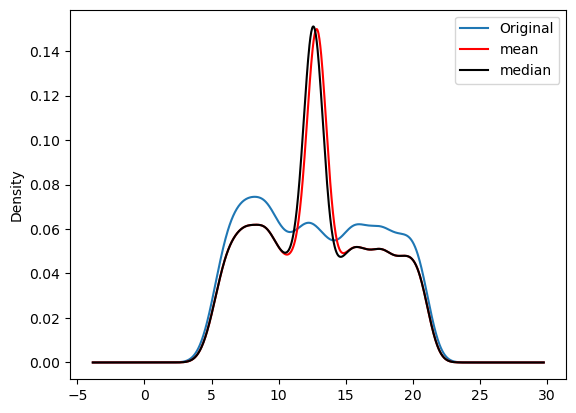

In [22]:
df_train['Item_Weight'].plot(kind = "kde", label = "Original")
df_train['Item_Weight_mean'].plot(kind = "kde", label = "mean",color ="red")
df_train['Item_Weight_median'].plot(kind = "kde", label = "median", color = "black")

plt.legend()
plt.show()

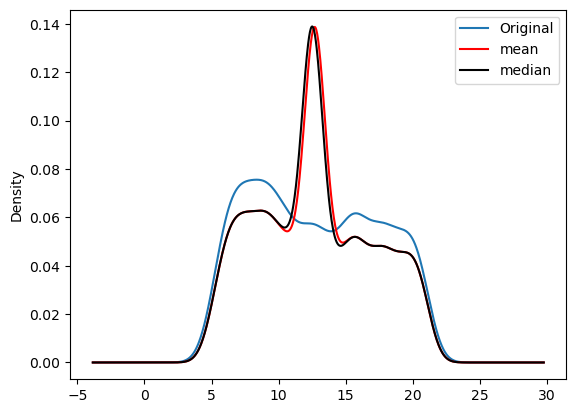

In [23]:
df_test['Item_Weight'].plot(kind = "kde", label = "Original")
df_test['Item_Weight_mean'].plot(kind = "kde", label = "mean",color ="red")
df_test['Item_Weight_median'].plot(kind = "kde", label = "median", color = "black")

plt.legend()
plt.show()

<Axes: >

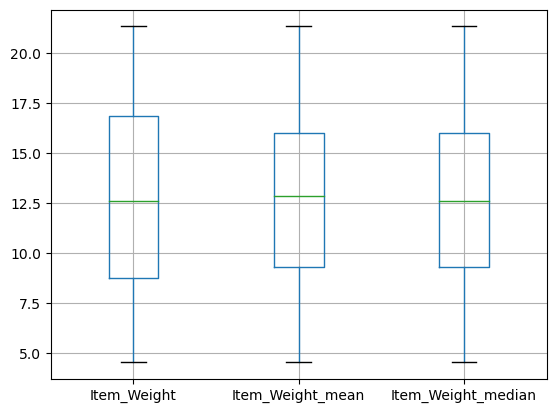

In [24]:
#after applying mean and median imputation the distribution has been altered, most values are being clustered around mean and median so this is not accepted
#plotting box plot
df_train[['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']].boxplot()

In [25]:
#using interpolate method of pandas
df_train['Item_Weight_Interpolate'] = df_train['Item_Weight'].interpolate(method = "linear")
df_test['Item_Weight_Interpolate'] = df_test['Item_Weight'].interpolate(method = "linear")

In [26]:
df_train['Item_Weight_Interpolate']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_Interpolate, Length: 8523, dtype: float64

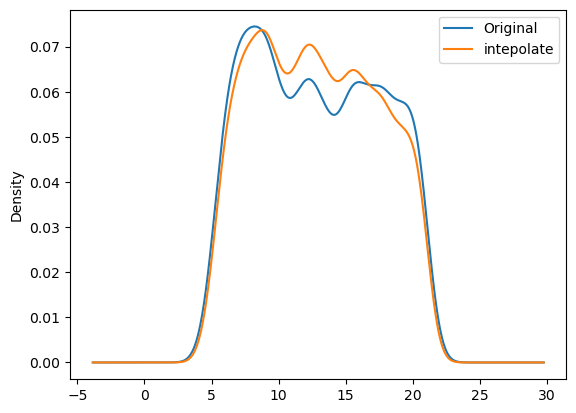

In [27]:
df_train['Item_Weight'].plot(kind = "kde", label = "Original")
df_train['Item_Weight_Interpolate'].plot(kind = "kde", label = "intepolate")

plt.legend()
plt.show()

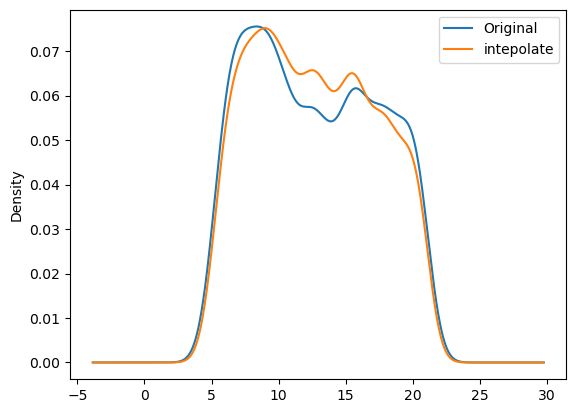

In [28]:
df_test['Item_Weight'].plot(kind = "kde", label = "Original")
df_test['Item_Weight_Interpolate'].plot(kind = "kde", label = "intepolate")

plt.legend()
plt.show()

In [29]:
df_train = df_train.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)
df_test = df_test.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)

In [30]:
df_train.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [31]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Interpolate         0
dtype: int64

In [32]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight_Interpolate         0
dtype: int64

##### Handling missing values for categorical data

In [33]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [34]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [35]:
df_train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [36]:
df_test['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [37]:
df_test['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64

In [38]:
#filling the missing values using mode on outlet size based on outlet type
Outlet_Size_mode_train = df_train.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x:x.mode()[0]))
#gives the most frequent outletsize value in the outlet type
Outlet_Size_mode_test = df_test.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x:x.mode()[0]))


In [39]:
Outlet_Size_mode_train

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [40]:
Outlet_Size_mode_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [41]:
df_train[Outlet_Size_mode_train]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_test[Outlet_Size_mode_test]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interpolate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
missing_datas  = df_train['Outlet_Size'].isnull()
missing_datas

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [44]:
missing_datas_test  = df_test['Outlet_Size'].isnull()
missing_datas_test

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [45]:
#filling the missing values in outletsize as per outlet type
df_train.loc[missing_datas,'Outlet_Size'] = df_train.loc[missing_datas, 'Outlet_Type'].apply(lambda x:Outlet_Size_mode_train[x])
df_test.loc[missing_datas_test,'Outlet_Size'] = df_test.loc[missing_datas_test, 'Outlet_Type'].apply(lambda x:Outlet_Size_mode_test[x])

In [46]:
df_train.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Interpolate      0
dtype: int64

In [47]:
df_test.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight_Interpolate      0
dtype: int64

In [48]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [49]:
df_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [50]:
#we can see the different varients of fat, we require consistent labeling of different varients
df_train.replace({'Item_Fat_Content': {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [51]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [52]:
df_test.replace({'Item_Fat_Content': {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [53]:
df_test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [54]:
df_train['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [55]:
df_test['Item_Visibility'].value_counts()

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

In [56]:
#in item visibility there are values with are zeros so we are going to treat that values as missing valuesand handle these values using interpolate imputation
df_train['Item_Visibility_interpolate'] = df_train['Item_Visibility'].replace(0,np.nan).interpolate(method = "linear")
df_test['Item_Visibility_interpolate'] = df_test['Item_Visibility'].replace(0,np.nan).interpolate(method = "linear")

In [57]:
df_train.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [58]:
df_test.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interpolate,Item_Visibility_interpolate
0,FDW58,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565


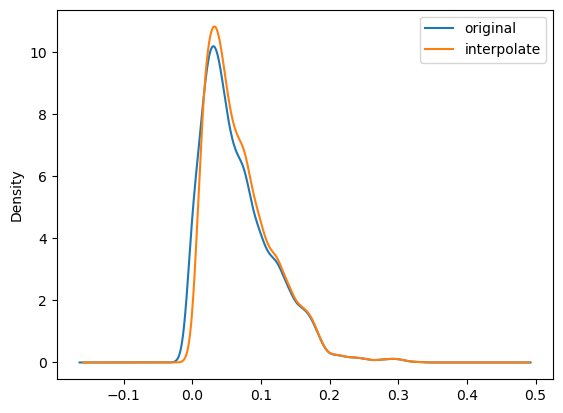

In [59]:
#checking distribution after and before interpolation on item visibility
df_train['Item_Visibility'].plot(kind="kde", label="original")
df_train['Item_Visibility_interpolate'].plot(kind="kde", label="interpolate")

plt.legend()
plt.show()

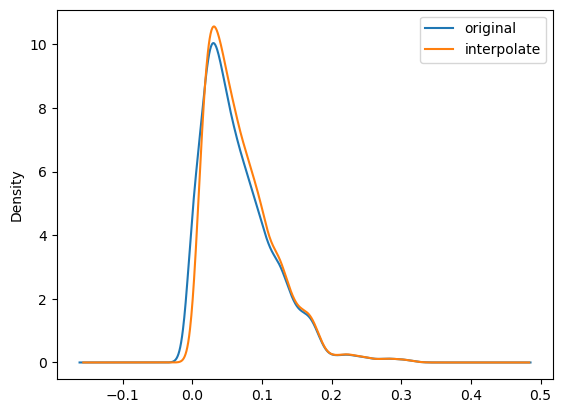

In [60]:
#checking distribution after and before interpolation on item visibility
df_test['Item_Visibility'].plot(kind="kde", label="original")
df_test['Item_Visibility_interpolate'].plot(kind="kde", label="interpolate")

plt.legend()
plt.show()

In [61]:
df_train = df_train.drop('Item_Visibility',axis= 1)
df_test = df_test.drop('Item_Visibility',axis= 1)

In [62]:
df_test.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interpolate,Item_Visibility_interpolate
0,FDW58,Low Fat,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.75,0.007565


In [63]:
#convering the establishment year of the outlet into its age to improve predicting sales and understanding business dynamics
from datetime import datetime

In [64]:
current_year = datetime.now().year

In [65]:
#calculating outlet age
df_train['Store_Age'] = current_year - df_train['Outlet_Establishment_Year']

In [66]:
df_train['Store_Age']

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Store_Age, Length: 8523, dtype: int64

In [67]:
df_train = df_train.drop('Outlet_Establishment_Year',axis=1)

In [68]:
df_train.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Store_Age
0,FDA15,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [69]:
df_test['Store_Age'] = current_year - df_test['Outlet_Establishment_Year']

In [70]:
df_test['Store_Age']

0       25
1       17
2       26
3       17
4       39
        ..
5676    27
5677    15
5678    22
5679    17
5680    22
Name: Store_Age, Length: 5681, dtype: int64

In [71]:
df_test = df_test.drop('Outlet_Establishment_Year',axis=1)

In [72]:
df_test.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interpolate,Item_Visibility_interpolate,Store_Age
0,FDW58,Low Fat,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,20.75,0.007565,25


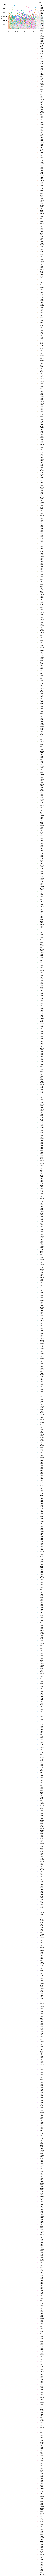

In [73]:
sns.scatterplot(x=df_train.index, y=df_train['Item_Outlet_Sales'], hue=df_train['Item_Identifier'])
plt.show()

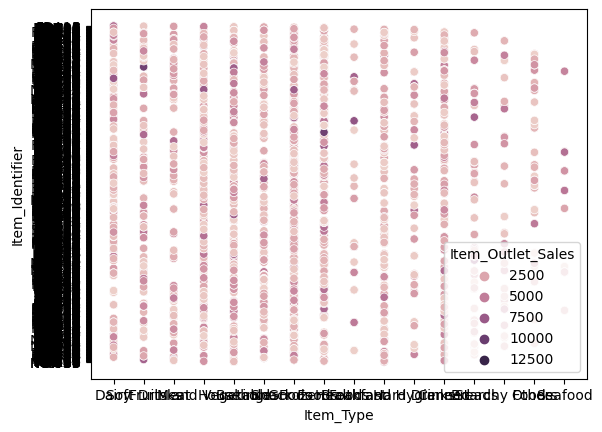

<Figure size 10000x500 with 0 Axes>

<Figure size 10000x500 with 0 Axes>

In [74]:
sns.scatterplot(x=df_train['Item_Type'], y=df_train['Item_Identifier'], hue=df_train['Item_Outlet_Sales'])
plt.show()
plt.figure(figsize=(100,5))

In [75]:
#checking item identifier
df_train['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [76]:
df_train['Item_Identifier'] = df_train['Item_Identifier']. apply(lambda x: x[:2])
df_test['Item_Identifier'] = df_test['Item_Identifier']. apply(lambda x: x[:2])

In [77]:
df_train['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [78]:
df_test['Item_Identifier'].value_counts()

Item_Identifier
FD    4076
NC    1087
DR     518
Name: count, dtype: int64

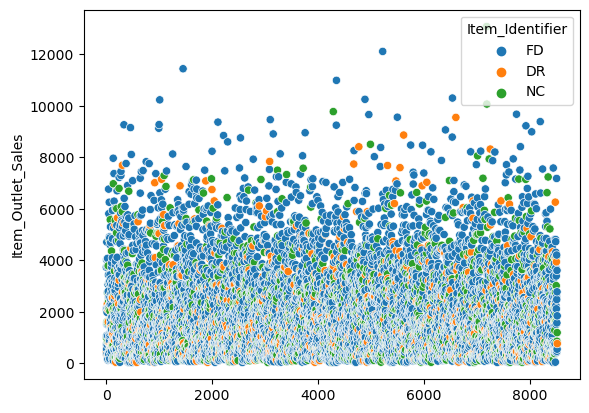

In [79]:
sns.scatterplot(x=df_train.index, y=df_train['Item_Outlet_Sales'], hue=df_train['Item_Identifier'])
plt.show()

##### Preprocessing
##### Label Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
df_train = df_train.apply(le.fit_transform)
df_test = df_test.apply(le.fit_transform)

In [82]:
df_train

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Store_Age
0,1,0,4,5592,9,1,0,1,2540,513,673,4
1,0,1,14,473,3,1,2,2,422,67,897,0
2,1,0,10,2901,9,1,0,1,1639,1335,727,4
3,1,1,6,4227,0,2,2,0,670,1400,641,5
4,2,0,9,627,1,0,2,1,865,452,553,7
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,13,4955,1,0,2,1,2047,168,4143,7
8519,1,1,0,2023,7,2,1,1,516,371,3450,3
8520,2,0,8,1263,6,2,1,1,1018,662,2382,2
8521,1,1,13,1857,3,1,2,2,1466,214,7685,0


#### One Hot Encoding

In [83]:
df_train = pd.get_dummies(df_train, columns =['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [84]:
df_train

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Store_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,1,4,5592,9,2540,513,673,4,True,False,False,True,False,True,False,False,False,True,False,False
1,0,14,473,3,422,67,897,0,False,True,False,True,False,False,False,True,False,False,True,False
2,1,10,2901,9,1639,1335,727,4,True,False,False,True,False,True,False,False,False,True,False,False
3,1,6,4227,0,670,1400,641,5,False,True,False,False,True,False,False,True,True,False,False,False
4,2,9,627,1,865,452,553,7,True,False,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,13,4955,1,2047,168,4143,7,True,False,True,False,False,False,False,True,False,True,False,False
8519,1,0,2023,7,516,371,3450,3,False,True,False,False,True,False,True,False,False,True,False,False
8520,2,8,1263,6,1018,662,2382,2,True,False,False,False,True,False,True,False,False,True,False,False
8521,1,13,1857,3,1466,214,7685,0,False,True,False,True,False,False,False,True,False,False,True,False


In [85]:
df_test = pd.get_dummies(df_test, columns =['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

##### Splitting training and testing data

In [86]:
X = df_train.drop('Item_Outlet_Sales', axis=1)

In [120]:
Y = df_train['Item_Outlet_Sales']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101, test_size = 0.2)

In [89]:
X.describe()

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Item_Weight_Interpolate,Item_Visibility_interpolate,Store_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.093864,7.226681,2941.096562,4.722281,856.986038,4215.158160,4.209316
std,0.522090,4.209990,1675.483234,2.837201,453.563920,2423.085144,2.730322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,1535.500000,2.000000,464.000000,2120.500000,2.000000
50%,1.000000,6.000000,2949.000000,5.000000,919.000000,4230.000000,4.000000
75%,1.000000,10.000000,4351.500000,7.000000,1293.000000,6312.500000,7.000000
max,2.000000,15.000000,5937.000000,9.000000,1442.000000,8404.000000,8.000000


#### Model Building

In [90]:
#using linear regression
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error, r2_score
LR = LinearRegression()

In [91]:
LR.fit(X_train, Y_train)

LinearRegression()

In [92]:
Y_pred = LR.predict(X_test)

In [93]:
Y_test

8179     801
8355    2056
3411    1529
7089     779
6954    1858
        ... 
1317    1386
4996     808
531      356
3891    1144
6629    1839
Name: Item_Outlet_Sales, Length: 1705, dtype: int64

In [94]:
print(r2_score(Y_test, Y_pred))
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

0.6235446152926483
558.3446430531257


In [95]:
#using Ridge Regression (L2 Regularization)
from sklearn.linear_model import Ridge

In [96]:
RM = Ridge(alpha= 1.0)
RM.fit(X_train, Y_train)

Ridge()

In [97]:
y_pred_ridge = RM.predict(X_test)

In [98]:
y_pred_ridge

array([1085.81102332, 1691.2935282 , 1051.03655021, ...,  748.01182947,
       1252.4867464 , 1711.60558956])

In [99]:
print(r2_score(Y_test, y_pred_ridge))
print(np.sqrt(mean_squared_error(Y_test,  y_pred_ridge)))

0.623565478679329
558.3291709386799


In [100]:
#using lasso regression
from sklearn.linear_model import Lasso

In [101]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)

Lasso()

In [102]:
y_pred_lasso = lasso_model.predict(X_test)

In [103]:
print(r2_score(Y_test, y_pred_lasso))
print(np.sqrt(mean_squared_error(Y_test, y_pred_lasso)))

0.623057176456929
558.7060017056536


In [104]:
from sklearn.ensemble import RandomForestRegressor
R_forest = RandomForestRegressor()

In [105]:
R_forest.fit(X_train, Y_train)

RandomForestRegressor()

In [106]:
y_pred_rf = R_forest.predict(X_test)

In [107]:
print(r2_score(Y_test, y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test, y_pred_rf)))

0.6052504975063455
571.7502887674733


In [108]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score

xg = XGBRFRegressor(n_estimators = 100, random_state = 42)
scores = cross_val_score(xg, X_train, Y_train, cv=5, scoring = 'r2')
print(scores.mean())

0.6587032817820122


In [109]:
xg.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [110]:
y_pred_xg = xg.predict(X_test)

In [138]:
# print(r2_score(Y_test, y_pred_xg))
print(np.sqrt(mean_squared_error(Y_test, y_pred_xg)))

535.161598529294


In [143]:
# hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [144]:
#defining models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1, 0.1)
max_features = ["auto", "sqrt", "log2"]
min_samples_split = np.linspace(0.1, 1.0, 10)

In [145]:
#defineing gird search
grid = dict(n_estimators = n_estimators)
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats =3, random_state = 101)

grid_search_forest = GridSearchCV(estimator= model, param_grid = grid, n_jobs = -1, scoring = 'r2', error_score=0, verbose = 2, cv=2)

In [149]:
grid_search_forest.fit(X_train, Y_train)

print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params =grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {params}")
    

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.623 using {'n_estimators': 1000}
0.589 (0.001) with: [{'n_estimators': 10}, {'n_estimators': 100}, {'n_estimators': 1000}]
0.621 (0.001) with: [{'n_estimators': 10}, {'n_estimators': 100}, {'n_estimators': 1000}]
0.623 (0.000) with: [{'n_estimators': 10}, {'n_estimators': 100}, {'n_estimators': 1000}]


In [151]:
grid_search_forest.best_params_

{'n_estimators': 1000}

#### XGBoost have the highest r2 score so, it is the best model for prediction. Thus, saving model using joblib.

In [128]:
import joblib

In [129]:
joblib.dump(xg, 'Bigmart')

['Bigmart']

In [130]:
bigmart_model = joblib.load('Bigmart')